# Movielens Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [6]:
import warnings
warnings.filterwarnings("ignore")

# Loading Data Movies, users, reviews

In [7]:
movies_filepath = "movie lens/movies.dat"
movies_data=pd.read_csv(movies_filepath,sep="::",header=None,names=["MovieID","Title","Genre"])

In [4]:
movies_data.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
users_filepath = "movie lens/users.dat"
users_data=pd.read_csv(users_filepath,sep="::",header=None,names=['UserID','Gender','Age','Occupation','Zip-code'])
ratings_filepath = "movie lens/ratings.dat"
ratings_data=pd.read_csv(ratings_filepath,sep="::",header=None,names=['UserID','MovieID','Rating','Timestamp'] )

In [6]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
print(movies_data.shape)
print(ratings_data.shape)
print(users_data.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


In [8]:
movies_data.count()

MovieID    3883
Title      3883
Genre      3883
dtype: int64

In [9]:
users_data.tail()

,UserID,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


<AxesSubplot:ylabel='UserID'>

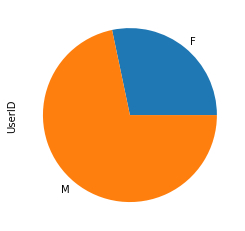

In [10]:
users_data.groupby("Gender")["UserID"].count().plot(kind='pie')

<AxesSubplot:ylabel='Age'>

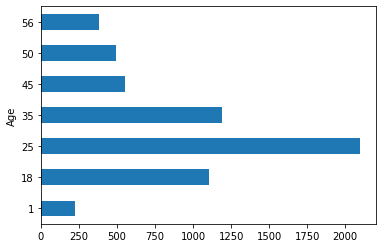

In [11]:
users_data.groupby('Age')['UserID'].count().plot(kind='barh')

In [12]:
ratings_data.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [13]:
finaldata = pd.merge(movies_data,ratings_data,on='MovieID')
finaldata = pd.merge(finaldata,users_data,on='UserID')
finaldata.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [14]:
finaldata.isnull().sum()

MovieID       0
Title         0
Genre         0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [15]:
finaldata.dropna(axis=0,inplace=True)

In [16]:
finaldata.tail()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843
1000208,3578,Gladiator (2000),Action|Drama,5727,5,958490171,M,25,4,92843


In [17]:
finaldata.groupby('Rating')['UserID'].count()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

# Visualising MoviesLens Data

<AxesSubplot:ylabel='Occupation'>

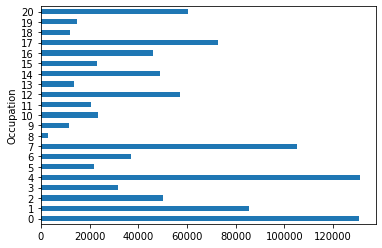

In [18]:
finaldata.groupby("Occupation")["UserID"].count().plot(kind='barh')

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

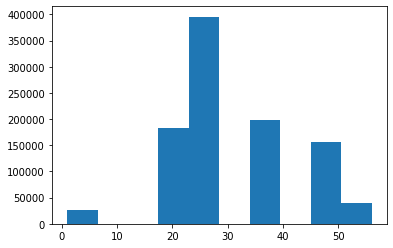

In [19]:
plt.hist(finaldata['Age'])

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64


<AxesSubplot:ylabel='Rating'>

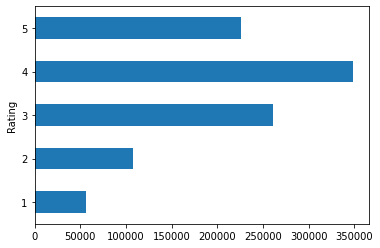

In [20]:
print(finaldata.groupby('Rating')['UserID'].count())
finaldata.groupby('Rating')['UserID'].count().plot(kind='barh')

<AxesSubplot:ylabel='UserID'>

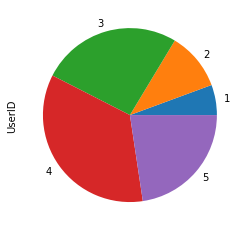

In [21]:
finaldata.groupby('Rating')['UserID'].count().plot(kind='pie')

# Visualising user rating of the movie ToyStory

In [22]:
moviesTitle = finaldata.Title.unique()

In [23]:
toyMovie = []
for i in moviesTitle:
    if i.startswith("Toy")== True:
        toyMovie.append(i)

toyMovie

['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toys (1992)']

Rating
1     25
2     44
3    214
4    578
5    724
Name: UserID, dtype: int64


<AxesSubplot:ylabel='Rating'>

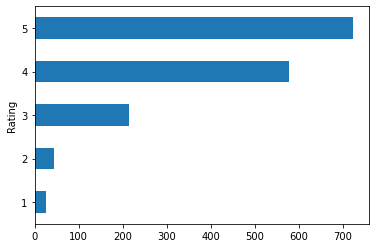

In [24]:
Toy_data = finaldata[finaldata['Title']=='Toy Story 2 (1999)']
print(Toy_data.groupby('Rating')['UserID'].count())
Toy_data.groupby('Rating')['UserID'].count().plot(kind='barh')

<AxesSubplot:ylabel='Age'>

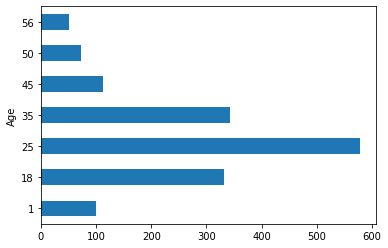

In [25]:
Toy_data.groupby('Age')['UserID'].count()
Toy_data.groupby('Age')['UserID'].count().plot(kind='barh')

[ 437 1148]


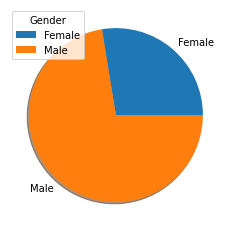

In [26]:
x = np.array(Toy_data.groupby('Gender')['UserID'].count())
print(x)
#Toy_data.groupby('Gender')['UserID'].count().plot(kind='pie')
my_labels = ["Female","Male"]
plt.pie(x,labels=my_labels,shadow=True)
plt.legend(title="Gender")

# Visualising Top25 Movies by Rating

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64


<AxesSubplot:xlabel='MovieID'>

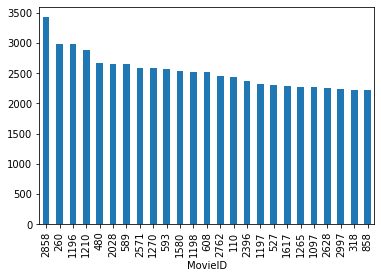

In [27]:
print(finaldata.groupby('MovieID')['Rating'].count().nlargest(25))
finaldata.groupby('MovieID')['Rating'].count().nlargest(25).plot(kind='bar')

In [28]:
finaldata[finaldata['UserID'] == 2696]

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


Rating
1     2
2     3
3     3
4    11
5     1
Name: UserID, dtype: int64


<AxesSubplot:ylabel='Rating'>

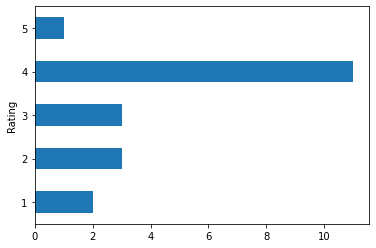

In [29]:
print(finaldata[finaldata['UserID']==2696].groupby('Rating')['UserID'].count())
finaldata[finaldata['UserID']==2696].groupby('Rating')['UserID'].count().plot(kind='barh')

(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <BarContainer object of 10 artists>)

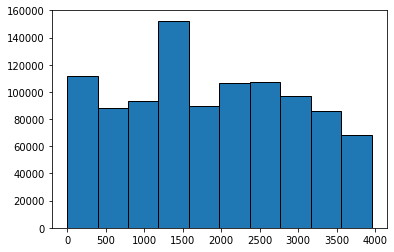

In [30]:
plt.hist(finaldata['MovieID'],edgecolor='k')

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

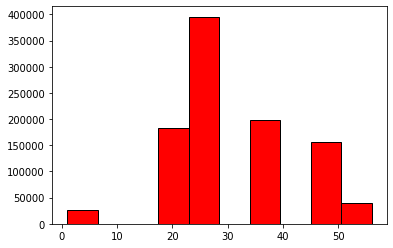

In [31]:
plt.hist(finaldata['Age'],edgecolor='k',color='r')

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

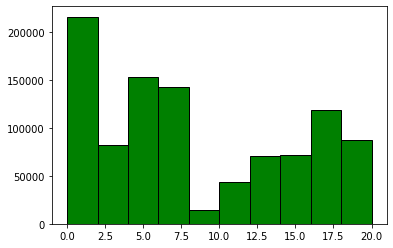

In [32]:
plt.hist(finaldata['Occupation'],edgecolor='k',color='g')

In [63]:
#moviegenre = finaldata.Genre.unique()
#print(moviegenre)
#genre_cat = ["Animation","Children's","Comedy","Musical","Romance",
             # "Drama","Action","Adventure","Fantasy","War","Sci-Fi","Thriller","Crime","Horror","Mystery","Western","Film_Noir"]
#print(genre_cat)
#genre_data = []
#for i in moviegenre:
#    if 

x = finaldata[finaldata['UserID'] == 2696]
y = [x.Genre]
z = str(y)
w = z.count("Animation")

print(z.info())


AttributeError: 'str' object has no attribute 'info'

# Training of KNN Model

In [34]:
features=finaldata.iloc[:500,[0,7,8]].values
label=finaldata.iloc[:500,[4]].values.reshape(-1,1)

In [35]:
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [1200,   35,    1],
       [1201,   35,    1],
       [1203,   35,    1]], dtype=int64)

In [36]:
label

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.25,random_state=113)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=27)

In [39]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [40]:
model.fit(x_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=27)

In [41]:
from sklearn.metrics import mean_absolute_error
prediction = model.predict(x_test)
print("Mean Absolute Error test data : " + str(mean_absolute_error(prediction, y_test)))

Mean Absolute Error test data : 0.584


In [42]:
model.score(x_train,y_train)

0.4

In [43]:
model.score(x_test,y_test)

0.488

In [44]:
# Test score is greater than Training score so the model can be used as Generalised model for the datasets